# zomato-dataset-analysis 🍽🍻🍟🍕


I was very facinated towards food. So i choose this dataset to do different Analysis and visualization
techniques. 

This dataset contains data of different restaurants from Bangalore. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. 

However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location.

Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

#### Below there commands are used to save the Jupyter notebook

In [1]:
# Installing the Jovian library

!pip install jovian --upgrade --quiet

In [2]:
# Importing Jovian library

import jovian

In [3]:
# Executing the below code will save the notebook

jovian.commit(project="zomato-dataset-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankith/zomato-dataset-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankith/zomato-dataset-analysis


'https://jovian.ai/ankith/zomato-dataset-analysis'

##### As we see that the notebook was saved we will now go now go and get Data and do some Analysis and present some good visualization

# Downloading the Dataset

Firstly We need to download the dataset to use. The link is already provided in the description above. You can also find a lot of interesting datasets on [Kaggle](https://www.kaggle.com/)

In [4]:
!pip install jovian opendatasets --upgrade --quiet

'opendatasets' is a Python library for downloading datasets from online sources like [Kaggle](https://www.kaggle.com) and Google Drive using a simple Python command.

In [5]:
data_url = 'https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants'

This is the Url which i took from kaggle to perform data analysis EDA

In [6]:
import opendatasets as od
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankithkoona
Your Kaggle Key: ········


  0%|          | 0.00/89.0M [00:00<?, ?B/s]

100%|██████████| 89.0M/89.0M [00:01<00:00, 74.1MB/s]


The abouve command is used to download the data from Kaggle.

We should give our Kaggle user-name and Kaggle Key to download the data. 

In [7]:
data_dir = './zomato-bangalore-restaurants'

In [8]:
import os
os.listdir(data_dir)

['zomato.csv']

The OS module in Python provides functions for interacting with the operating system and also have many functions to interact with the file system.

In the above output we can see the file name is zomato.csv

### Let us save and upload our work to Jovian before continuing.

In [9]:
jovian.commit(project="zomato-dataset-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankith/zomato-dataset-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankith/zomato-dataset-analysis


'https://jovian.ai/ankith/zomato-dataset-analysis'

# Data Preparation and Cleaning

Lets import all the libraries which are requied to do EDA and visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

These are the libraries which I am using for EDA and Visualization.

* Pandas : a software library written for the Python programming language for data manipulation and analysis

* Numpy : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along           with a large collection of high-level mathematical functions to operate on these arrays.

* Matplotlib : a plotting library for the Python programming language and its numerical mathematics extension NumPy.

* Seaborn : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive             and informative statistical graphics.

### Lets load the Dataset

In [11]:
zomato_df = pd.read_csv('./zomato-bangalore-restaurants/zomato.csv')

In [13]:
# this command will show show the dataset

zomato_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [14]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

* Above command will give us all the names of the columns in the dataset

In [15]:
zomato_df.shape

(51717, 17)

We can see that there are 51717 rows of Data and 17 Columns

In [16]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

When we looked into the information of the data we can see some values are missing in different columns

* Rate
* Phone
* Location
* Rest_type
* Dish_liked
* cuisines
* Approx_cost(for two people)


In [17]:
zomato_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

We can see the number of null values thar are there in above mentioned columns

In [18]:
# Lets find the total number of null values

zomato_df.isnull().sum().sum()

print('The total number of null values in the whole dataset is {}.'.format(zomato_df.isnull().sum().sum()))

The total number of null values in the whole dataset is 37700.


#### Removing the Columns which are not usefull

When I studied the dataset i came to see that some columns are not usefull to perform the EDA.

So now I am going to delete those columns.

In [19]:
zomato_df = zomato_df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'], axis = 1)

* So you can see that I used drop method to drop some columns

The dropped columns are url, address, phone, menu_item, dish_liked, reviews_list

#### Lets see the whole dataset once

In [20]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
jovian.commit(project="zomato-dataset-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankith/zomato-dataset-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankith/zomato-dataset-analysis


'https://jovian.ai/ankith/zomato-dataset-analysis'

#### Deleting Duplicate values

In [22]:
zomato_df.drop_duplicates(inplace = True)
zomato_df.shape

(51609, 11)

We can see now the duplicates data/rows are deleted.

## Cleaning Data

* Lets check the Column "rate"

In [23]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Rate is nothing but the rating of the restaurent out of 5.

So, We can see in the above data that there are so many unique elements in the column "rate".

And also we can observe Unique elements "NEW" and "-" in the column. 

For that we will now write a function to change those values to 'NAN' and also transform all the ratings into float.

In [24]:
# function to handle rate column.

def handle_rate (value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
zomato_df['rate'] = zomato_df['rate'].apply(handle_rate)
zomato_df['rate'].head()
    


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

We can now see that all the values in rate column are converted into float values

* let's check the null values in rate column

In [25]:
# checking null values in rate column

zomato_df['rate'].isnull().sum()
print("Total number of Null values incolumn rate is {}.".format(zomato_df['rate'].isnull().sum()))

Total number of Null values incolumn rate is 10019.


* Filling null values with mean of the rate column

In [26]:
zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace = True)

In [27]:
print("Total number of Null values incolumn rate is {}.".format(zomato_df['rate'].isnull().sum()))

Total number of Null values incolumn rate is 0.


We can see there are no NULL values in the rate column

* Let's drop all null values in the whole dataset

In [28]:
zomato_df.dropna(inplace = True)

In [29]:
zomato_df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

We can see that there no null values in the whole dataset.

* Lets check the column Location

We can see that there two columns which are 1.location and 2.listed_in(city)

we will check unique data in both the columns and delete/drop one column

In [30]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [31]:
zomato_df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

We can see similar values in both the columns. So we will drop one column.

In [32]:
zomato_df = zomato_df.drop(['listed_in(city)'], axis = 1)

In [33]:
zomato_df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [34]:
zomato_df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

we can see that there so many locations with less number of restaurents. So we will cluster all of them and name them as Others.

In [35]:
location_df = zomato_df['location'].value_counts(ascending = False)

location_lessthan_300 = location_df[location_df<300]

# Writing a function to cluster the data below 300

def handle_location (value):
    if(value in location_lessthan_300):
        return 'others'
    else:
        return value
    
zomato_df['location'] = zomato_df['location'].apply(handle_location)
zomato_df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

* Lets check the column approx_cost(for two people)

Rename some column names for easy access

In [36]:
zomato_df.rename(columns = {'approx_cost(for two people)':'cost2plates','listed_in(type)':'type'}, inplace =True)

In [37]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [38]:
zomato_df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

We can see in the column cost2plate some values are with comma (for ex 2,300) this will taken as string value. So let's covert them into float.

In [39]:
def handle_comma (value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
zomato_df['cost2plates'] = zomato_df['cost2plates'].apply(handle_comma)

zomato_df['cost2plates'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost2plates, dtype: float64

* Let's check the column rest_type

In [40]:
zomato_df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Pop Up                            2
Bakery, Food Court                2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

Similar to the location column there are so many rest_tupe values. So we will cluster them and save as others.

In [41]:
rest_type_df = zomato_df['rest_type'].value_counts(ascending = True)

rest_type_lessthan_1000 = rest_type_df[rest_type_df<1000]

# Writing a function to cluster the data below 1000

def handle_rest_type (value):
    if(value in rest_type_lessthan_1000):
        return 'others'
    else:
        return value
    
zomato_df['rest_type'] = zomato_df['rest_type'].apply(handle_rest_type)
zomato_df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

* Let's check the column Cuisines

In [42]:
zomato_df['cuisines'].value_counts()

North Indian                                                        2852
North Indian, Chinese                                               2351
South Indian                                                        1820
Biryani                                                              903
Bakery, Desserts                                                     898
                                                                    ... 
Cafe, Healthy Food, North Indian, Biryani, Continental, Desserts       1
Healthy Food, Salad, Mediterranean                                     1
Seafood, Chinese, South Indian                                         1
North Indian, Chinese, Continental, Italian, South Indian              1
Turkish, Fast Food, Biryani, Chinese                                   1
Name: cuisines, Length: 2704, dtype: int64

Similar to what we have done before we will the do the same thing by using function and create  cluster and make others.

In [44]:
cuisines_df = zomato_df['cuisines'].value_counts(ascending = False)

cuisines_lessthan_100 = cuisines_df[cuisines_df<100]

# Function for clustering the data below 100

def handle_cuisines (value):
    if(value in cuisines_lessthan_100):
        return 'others'
    else:
        return value
    
zomato_df['cuisines'] = zomato_df['cuisines'].apply(handle_cuisines)
zomato_df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
North Indian, Chinese, Seafood           102
Italian, Pizza                           102
Name: cuisines, Length: 70, dtype: int64

## We have checked all the columns and cleaned all the columns

In [45]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


See the data after cleaning the data it is to perfect 😃

# Exploratory Analysis and Visualization

let's do some analysis and visialize it using the cleaned Data

* we will check the how many restaurents are there in each location and check which location is having highest

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

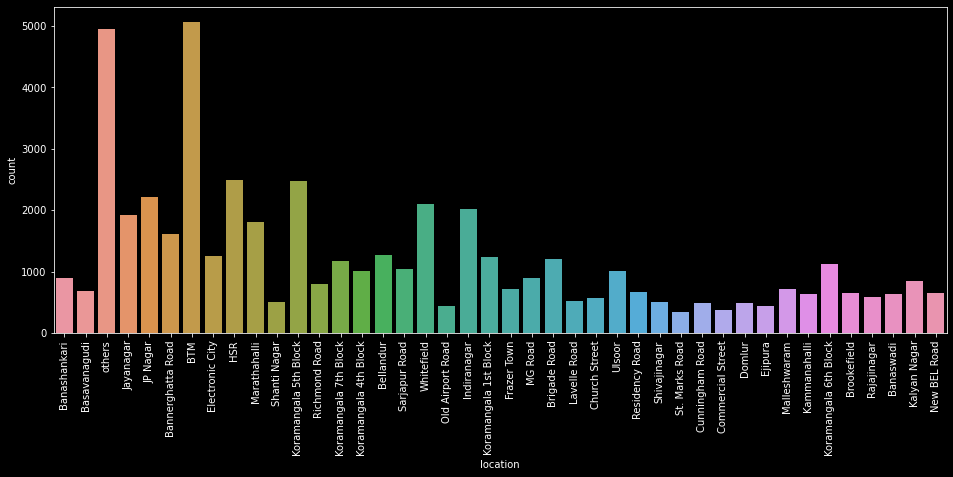

In [46]:
plt.figure(figsize = (16,6))

ax = sns.countplot(zomato_df.location)
plt.xticks(rotation = 90)

We can see in the about plot that the location 'BTM' is having high number of restaurents

* Let's check the online_orders

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


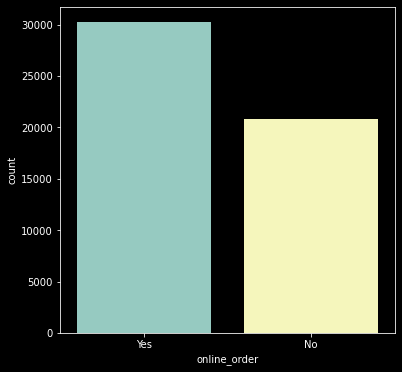

In [47]:
plt.figure(figsize = (6,6))

sns.countplot(zomato_df['online_order']);

we can see that many of the restaurents have online_order facility

* Let's plot for book_table column

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


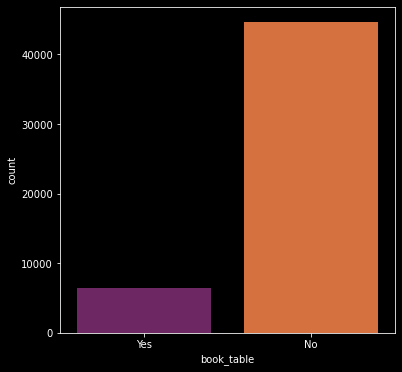

In [48]:
plt.figure(figsize = (6,6))

sns.countplot(zomato_df['book_table'], palette = 'inferno');

We can see there are high number of restaurents which do not accept booking the table in advance

* comaparing rate and online_orders

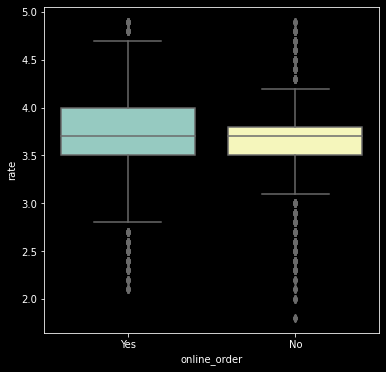

In [49]:
plt.figure(figsize = (6,6))

sns.boxplot(x = 'online_order', y = 'rate', data = zomato_df);

We can see that the restauraents which are having online_order facility have good ratings

* Comparing book_table and rate

<AxesSubplot:xlabel='book_table', ylabel='rate'>

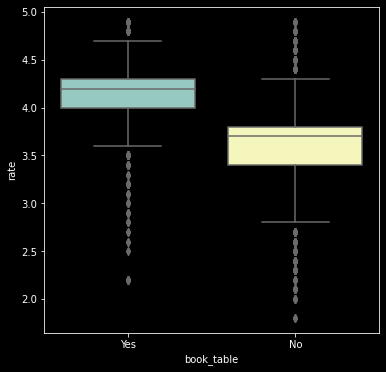

In [50]:
plt.figure(figsize = (6,6))

sns.boxplot(x = 'book_table', y = 'rate', data = zomato_df)

We can see that the restaurents which are having booling a table facility have good ratings.

# Asking and Answering Questions

# Q1. How many restaurents has online ordering facility in each location

In [57]:
df1 = zomato_df.groupby(['location','online_order'])['name'].count()

# converting df1 data to csv

df1.to_csv('location_online.csv')

# reading the csv file

df1 = pd.read_csv('location_online.csv')

# conversting that into pivot table

df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

We can the no of restaurents that are having online order facility in different locations

Now we will plot the data

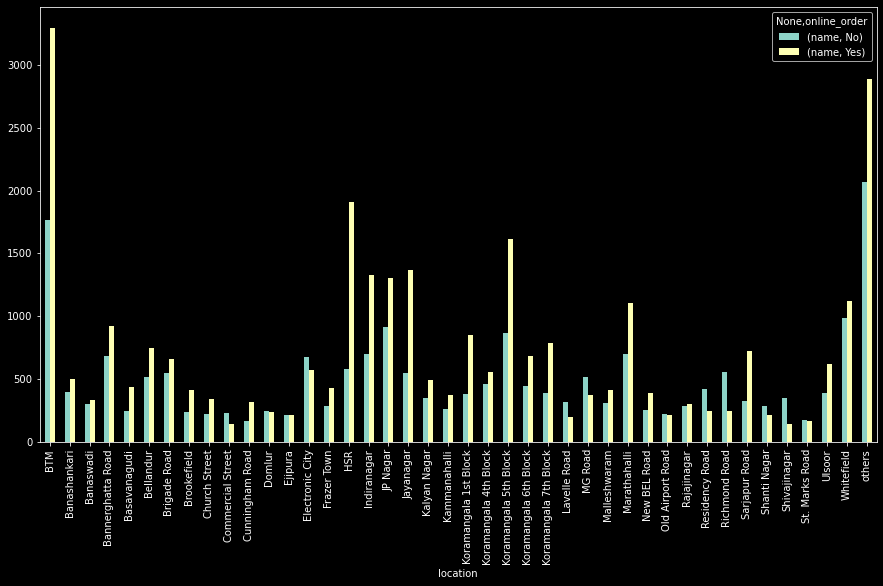

In [59]:
df1.plot(kind = 'bar', figsize = (15,8));

# Q2. How many restaurents has Booking facility in each location

In [60]:
df2 = zomato_df.groupby(['location','book_table'])['name'].count()

# converting df1 data to csv

df2.to_csv('location_book_table.csv')

# reading the csv file

df2 = pd.read_csv('location_book_table.csv')

# conversting that into pivot table

df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)

df2



name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<AxesSubplot:xlabel='location'>

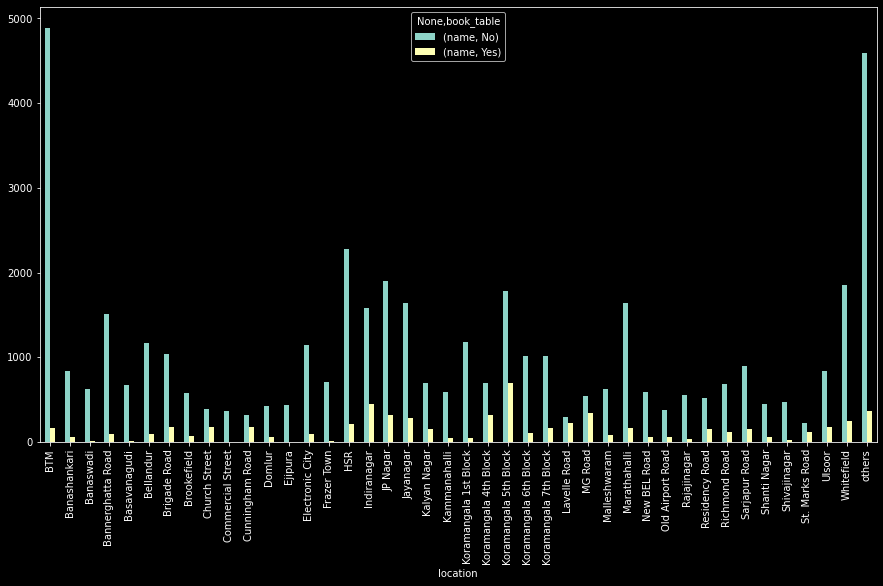

In [61]:
df2.plot(kind = 'bar', figsize = (15,8))

# Q3. Group different type of restaurents location wise

In [62]:
df3 = zomato_df.groupby(['location','type'])['name'].count()

# converting df1 data to csv

df3.to_csv('location_type.csv')

# reading the csv file

df3 = pd.read_csv('location_type.csv')

# conversting that into pivot table

df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)

df3



name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

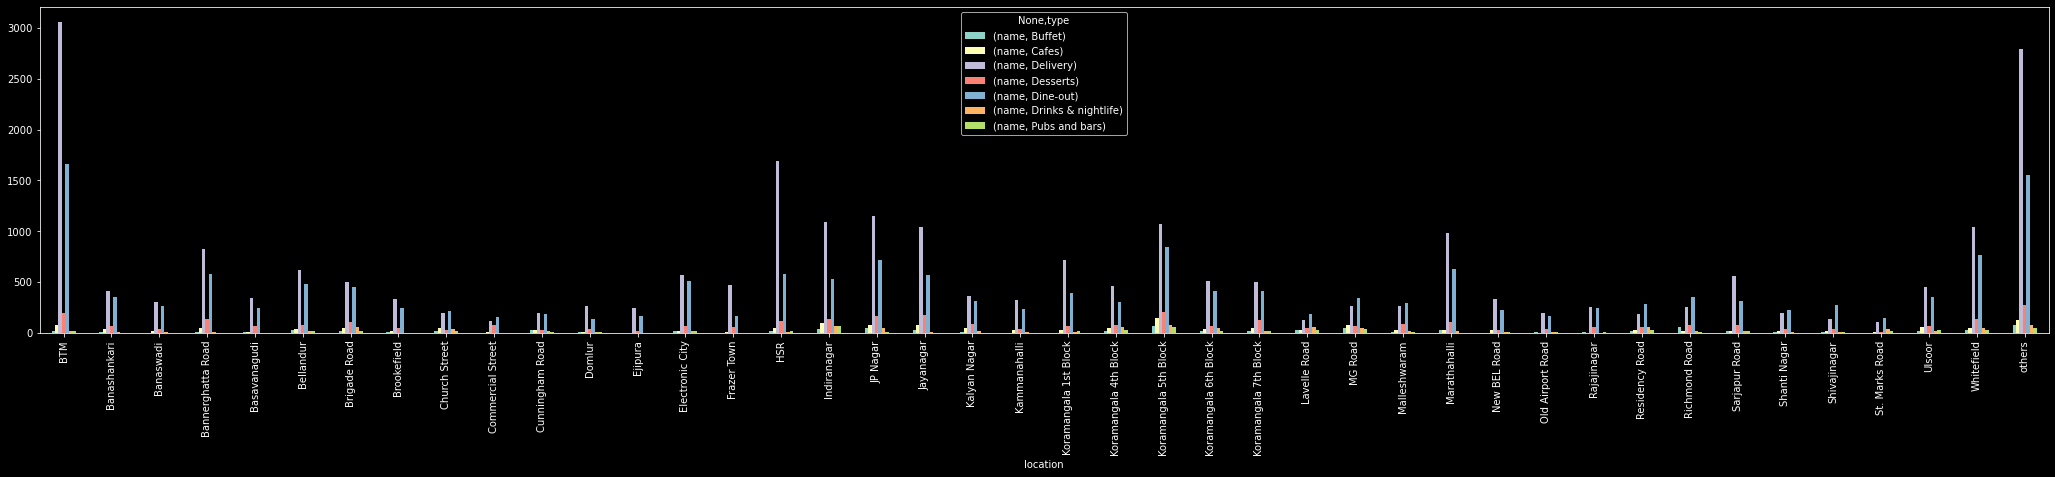

In [67]:
df3.plot(kind = 'bar', figsize = (36,6))

# Q4. Visualizing Types of Restaurents vs Rate

<AxesSubplot:xlabel='type', ylabel='rate'>

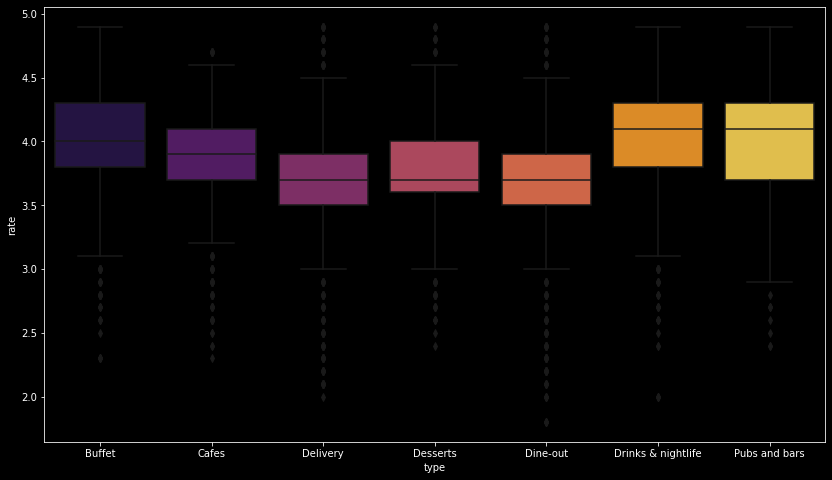

In [70]:
plt.figure(figsize = (14,8))

sns.boxplot(x = 'type', y = 'rate', data = zomato_df, palette = 'inferno')

We can see that the restaurents which are having Drinks and Nightlife are having good ratings compare to other

# Q5. Find no of votes location wise

In [74]:
df4 = zomato_df[['votes','location']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending = False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

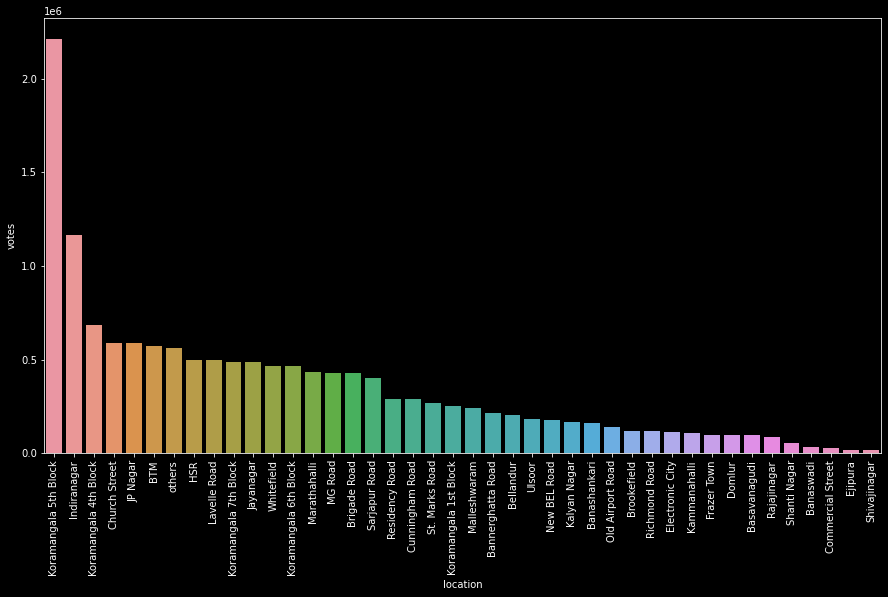

In [75]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['votes'])
plt.xticks(rotation = 90)

# Inferences and Conclusion

While analysing the data i came to know that if we want to start a new food business we can see thsi kind of data then analyse it and see which location is good to start a new restaurent or any other small food business. This will help in furture business persons to start their business. In which this also shows which restaurent is good and have good ratings.

# References and Future Work

For my future work I plan to :

* Implement machine training to predict which location is best for ne food business.

* Combine this dataset with specific data about different foods and people that visiting the restaurent for evaluating daily   report.

* Making my own dataset by crawing data from website.

* Learn more about data sciences in general to improve my understanding.
